In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [4]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

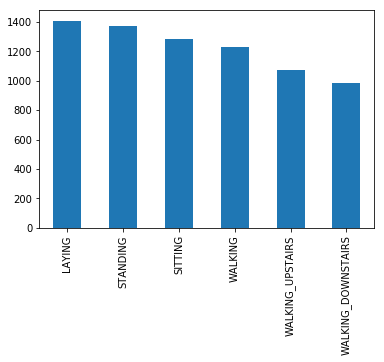

In [5]:
train_outcome = train['Activity'].value_counts()
train_outcome.plot.bar()

### Visualizing Outcome Distribution

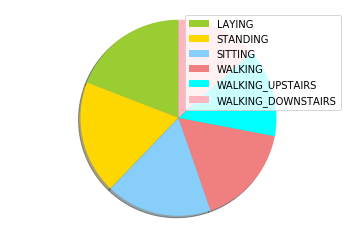

In [6]:
df = pd.DataFrame({'labels': train_outcome.index,
                  'values':train_outcome.values})

labels = df['labels']
sizes = df['values']
colors = ['Yellowgreen','gold','lightskyblue',
          'lightcoral','cyan','lightpink']

patches, texts = plt.pie(sizes, colors = colors, 
                         shadow = True, pctdistance=1.1,
                        labeldistance=1.2,startangle=90)
plt.legend(patches,labels,loc='best')
plt.axis('equal')
plt.tight_layout
plt.show()

In [7]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train_label = train.Activity.values.astype(object)
X_test = test.drop(['Activity','subject'],axis = 1)
y_test_label = test.Activity.values.astype(object)

print('Dimensions of Train set: ',X_train.shape)
print('Dimensions of Test set: ',X_test.shape)

Dimensions of Train set:  (7352, 561)
Dimensions of Test set:  (2947, 561)


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(y_train_label)
Y_test = le.fit_transform(y_test_label)


array([2, 2, 2, ..., 5, 5, 5])

### Hyperparameter tuning using grid search and cross validation

In [9]:
param_grid = [{'kernel':['rbf','linear'],
               'gamma':[1e-3,1e-4],
              'C':[1,10,100,1000]}]

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [11]:
svm_model = GridSearchCV(SVC(),param_grid,cv = 5)
svm_model.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
y_pred_cv = svm_model.predict(X_test)

In [13]:
print('Best score for Training Data: ',svm_model.best_score_)
print('Best C: ',svm_model.best_estimator_.C)
print('Best gamma: ',svm_model.best_estimator_.gamma)
print('Best Kernel: ',svm_model.best_estimator_.kernel)

Best score for Training Data:  0.9413837594861194
Best C:  1000
Best gamma:  0.0001
Best Kernel:  rbf


In [17]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [42]:
print(confusion_matrix(Y_test,y_pred_cv))
print('-'*50)
print(classification_report(Y_test,y_pred_cv))
print('-'*50)
print("Training set score for SVM: %f"%svm_model.score(X_train,Y_train))
print('Test set score for SVM:  %f'%svm_model.score(X_test,Y_test))
svm_model.score

[[537   0   0   0   0   0]
 [  0 436  53   0   0   2]
 [  0  15 517   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   5 406   9]
 [  0   0   0  24   0 447]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.89      0.93       491
           2       0.91      0.97      0.94       532
           3       0.94      0.99      0.97       496
           4       0.99      0.97      0.98       420
           5       0.97      0.95      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

--------------------------------------------------
Training set score for SVM: 0.991839
Test set score for SVM:  0.961995


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [43]:
cv_results = pd.DataFrame(svm_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.960875,0.317036,4.619554,0.242533,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.904147,0.863358,0.898639,0.912245,0.931293,0.901936,0.022235,15
1,2.115988,0.068684,0.877299,0.032189,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.924541,0.901428,0.959864,0.945578,0.972789,0.940840,0.025393,2
2,22.477341,0.388843,7.564671,0.151977,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.765466,0.794018,0.793197,0.780272,0.810204,0.788631,0.014978,16
3,2.270899,0.146504,1.064592,0.274641,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.924541,0.901428,0.959864,0.945578,0.972789,0.940840,0.025393,2
4,4.345911,0.225639,2.316275,0.126245,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.927940,0.893270,0.940136,0.954422,0.957823,0.934718,0.023304,12
5,2.312873,0.204406,0.792747,0.061565,10,0.001,linear,"{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}",0.922502,0.896669,0.954422,0.944218,0.968707,0.937304,0.025288,10
6,8.979461,0.257754,4.561590,0.130748,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.904147,0.864038,0.898639,0.912245,0.932653,0.902344,0.022365,14
7,2.227722,0.147672,0.768563,0.034845,10,0.0001,linear,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}",0.922502,0.896669,0.954422,0.944218,0.968707,0.937304,0.025288,10
8,2.505564,0.189002,1.179327,0.065786,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.927260,0.902787,0.959184,0.948980,0.965306,0.940703,0.022951,5
9,2.480578,0.248922,0.776557,0.046949,100,0.001,linear,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.928620,0.895989,0.953741,0.942857,0.965986,0.937439,0.024108,6


In [27]:
best_score = svm_model.best_score_
best_hyperparams = svm_model.best_params_

print('The best test score is {0} corresponding to hyper parameters {1}'.format(best_score,best_hyperparams))

The best test score is 0.9413837594861194 corresponding to hyper parameters {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
